In [9]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random

# Set random seed for reproducibility (if needed)
random.seed(42)
np.random.seed(42)

# Load patch embeddings for one subject
base_path = '/home/ssim0068/multimodal-AD/src/mri/XAI/features'
subject_file = os.path.join(base_path, '002_S_0413_patch_embeddings.npy')


print("PCA Feature Analysis: Single Subject Patch Embeddings")
print(f"Loading: {subject_file}")

# Load patch embeddings: [215, 768]
patch_embeddings = np.load(subject_file)
n_patches, feature_dim = patch_embeddings.shape
print(f"Loaded: {n_patches} patches, {feature_dim} features per patch")

# Perform PCA on all patches: reduce from 768 features to 3 principal components
print("\n" + "=" * 70)
print("Performing PCA on patch embeddings")
print("=" * 70)

# Scale features
scaler = StandardScaler()
patches_scaled = scaler.fit_transform(patch_embeddings)

# Apply PCA: [215, 768] -> [215, 3]
pca = PCA(n_components=3, random_state=42, whiten=True)
patches_pca = pca.fit_transform(patches_scaled)


PCA Feature Analysis: Single Subject Patch Embeddings
Loading: /home/ssim0068/multimodal-AD/src/mri/XAI/features/002_S_0413_patch_embeddings.npy
Loaded: 215 patches, 768 features per patch

Performing PCA on patch embeddings



Selected patches: [50, 60, 70, 80]
(Each patch corresponds to a unique 16×16×16 voxel region in the brain)

Visualizing Principal Components for Selected Patches


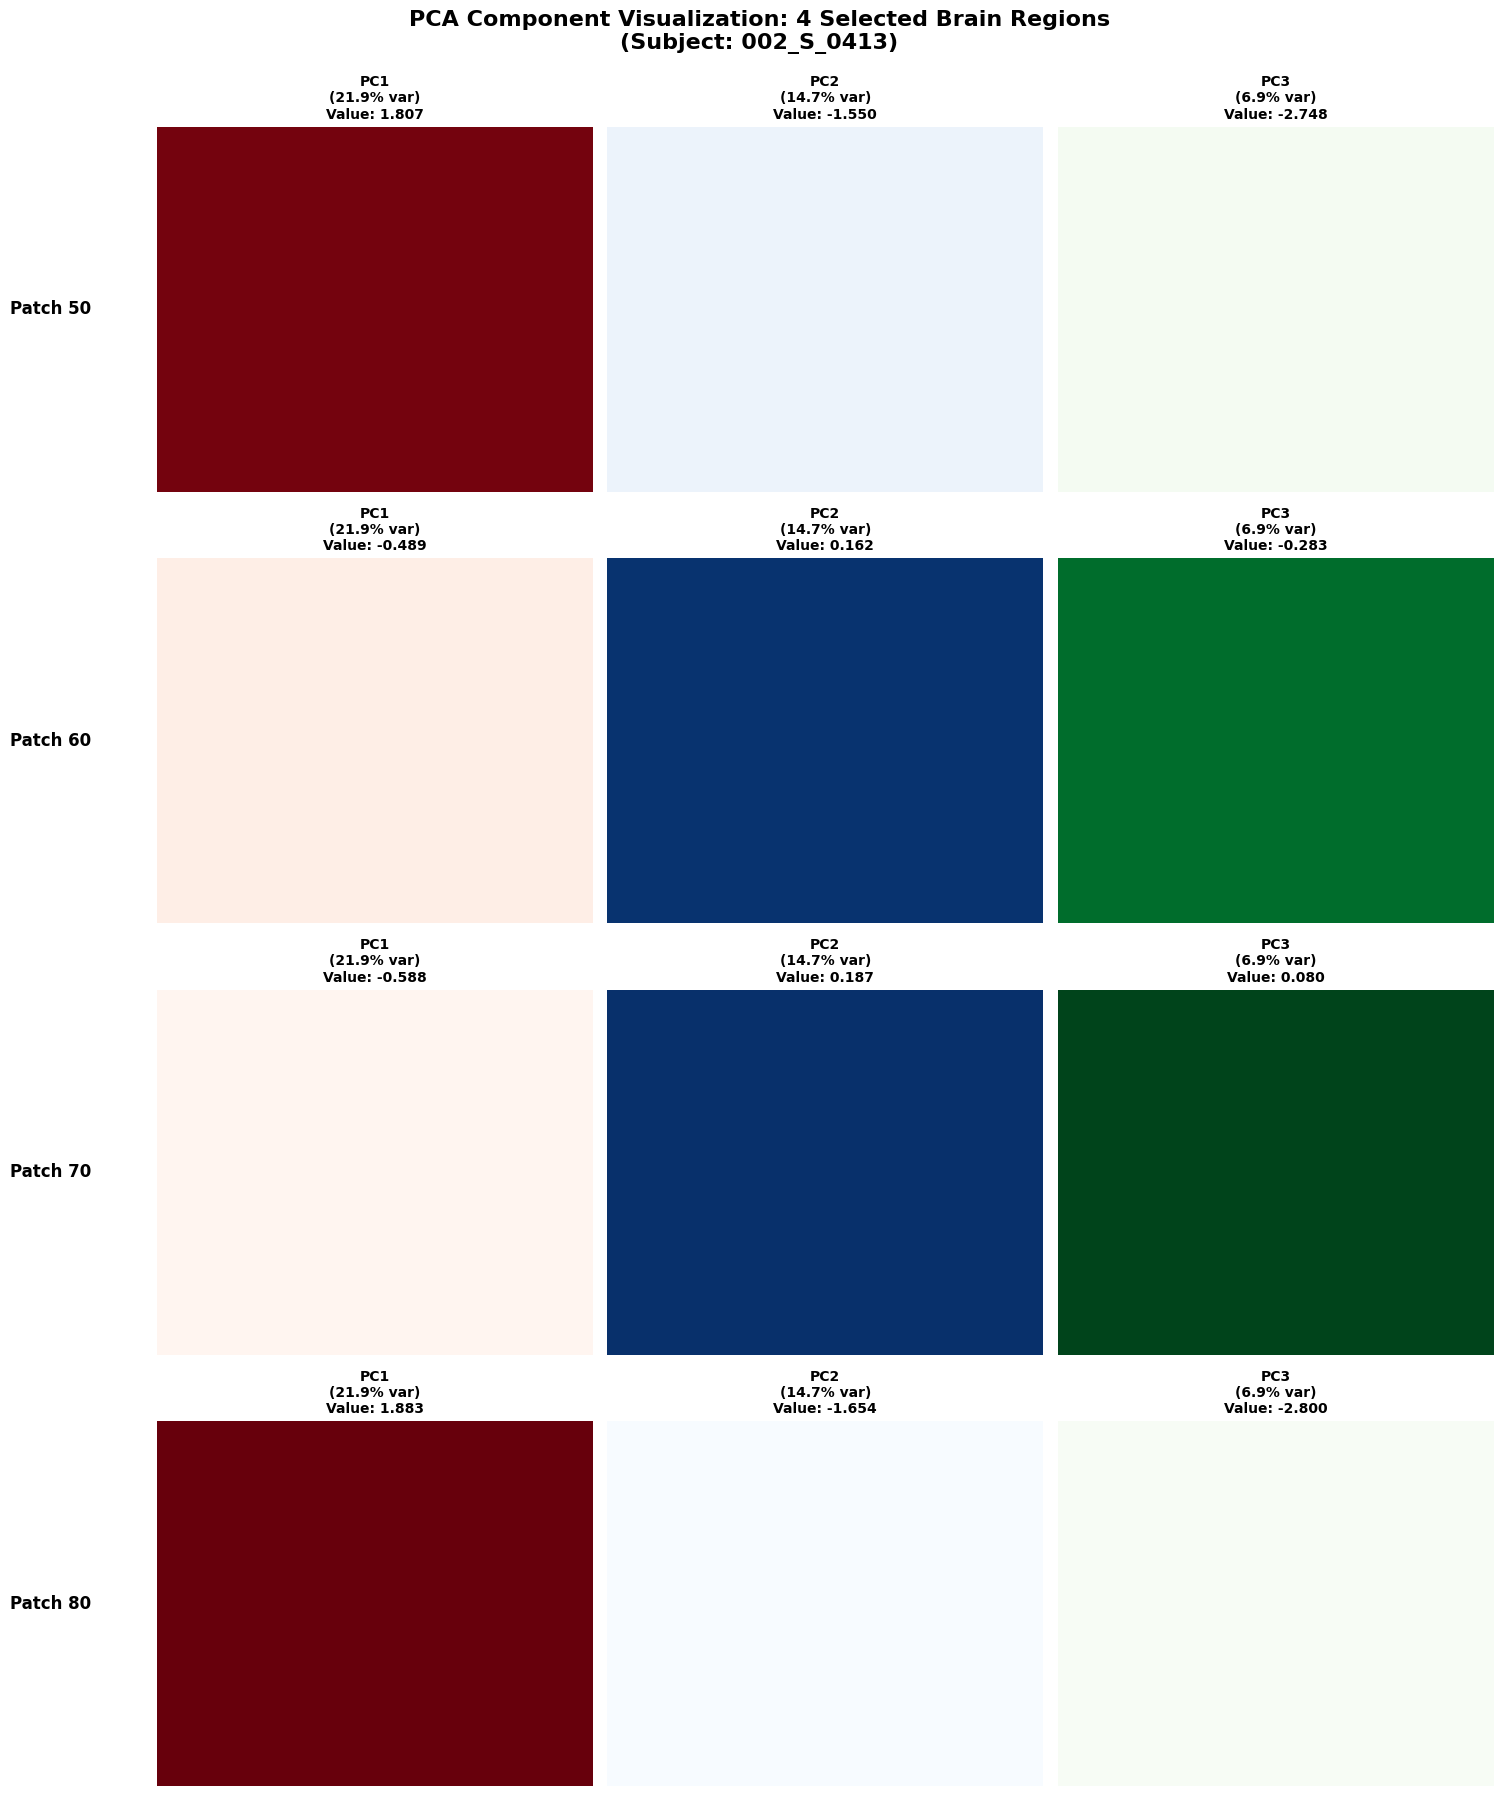


PCA Component Values for Selected Patches:

Patch 50 (region 1):
  PC1: 1.8066 (21.93% variance)
  PC2: -1.5503 (14.65% variance)
  PC3: -2.7477 (6.94% variance)

Patch 60 (region 2):
  PC1: -0.4892 (21.93% variance)
  PC2: 0.1623 (14.65% variance)
  PC3: -0.2828 (6.94% variance)

Patch 70 (region 3):
  PC1: -0.5875 (21.93% variance)
  PC2: 0.1865 (14.65% variance)
  PC3: 0.0800 (6.94% variance)

Patch 80 (region 4):
  PC1: 1.8833 (21.93% variance)
  PC2: -1.6542 (14.65% variance)
  PC3: -2.8003 (6.94% variance)


In [10]:
# Select specific patches: 50, 60, 70, 80
selected_indices = [50, 60, 70, 80]

print(f"\nSelected patches: {selected_indices}")
print("(Each patch corresponds to a unique 16×16×16 voxel region in the brain)")

# Extract PCA values for selected patches
selected_pca = patches_pca[selected_indices]  # [4, 3]

# Visualization: Show 3 images (one for each PC) for each selected patch
print("\n" + "="*70)
print("Visualizing Principal Components for Selected Patches")
print("="*70)

# Create figure: 4 rows (patches) × 3 columns (PC components)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

# Normalize PCA values for visualization (per component across all selected patches)
pca_normalized = selected_pca.copy()
for comp_idx in range(3):
    comp_values = selected_pca[:, comp_idx]
    min_val = comp_values.min()
    max_val = comp_values.max()
    if max_val > min_val:
        pca_normalized[:, comp_idx] = (comp_values - min_val) / (max_val - min_val)
    else:
        pca_normalized[:, comp_idx] = 0.5  # If all same, use middle value

# Color maps for each component
colormaps = ['Reds', 'Blues', 'Greens']

for patch_idx, patch_num in enumerate(selected_indices):
    for comp_idx in range(3):
        ax = axes[patch_idx, comp_idx]
        
        # Get normalized PCA value for this patch and component
        pc_value = pca_normalized[patch_idx, comp_idx]
        actual_value = selected_pca[patch_idx, comp_idx]
        
        # Create a single-color image representing the PC value
        # Use a square image (e.g., 10x10) with color intensity based on PC value
        img_size = 10
        img = np.ones((img_size, img_size)) * pc_value
        
        # Display as image
        im = ax.imshow(img, cmap=colormaps[comp_idx], vmin=0, vmax=1, aspect='auto')
        ax.axis('off')
        
        # Add title and value
        variance_pct = pca.explained_variance_ratio_[comp_idx] * 100
        ax.set_title(f'PC{comp_idx+1}\n({variance_pct:.1f}% var)\nValue: {actual_value:.3f}', 
                    fontsize=10, fontweight='bold')
        
        # Add patch number label on the left
        if comp_idx == 0:
            ax.text(-0.15, 0.5, f'Patch {patch_num}', 
                   transform=ax.transAxes, fontsize=12, fontweight='bold',
                   ha='right', va='center', rotation=0)

plt.suptitle('PCA Component Visualization: 4 Selected Brain Regions\n(Subject: 002_S_0413)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print PCA values for selected patches
print("\n" + "="*70)
print("PCA Component Values for Selected Patches:")
print("="*70)
for i, idx in enumerate(selected_indices):
    print(f"\nPatch {idx} (region {i+1}):")
    print(f"  PC1: {selected_pca[i, 0]:.4f} ({pca.explained_variance_ratio_[0]:.2%} variance)")
    print(f"  PC2: {selected_pca[i, 1]:.4f} ({pca.explained_variance_ratio_[1]:.2%} variance)")
    print(f"  PC3: {selected_pca[i, 2]:.4f} ({pca.explained_variance_ratio_[2]:.2%} variance)")
